input layer has mean -0.001217 and std 0.998020
hidden layer 1 has mean 0.563872 and std 0.824225
hidden layer 2 has mean 0.622851 and std 0.872304
hidden layer 3 has mean 0.595226 and std 0.883256
hidden layer 4 has mean 0.608914 and std 0.876379
hidden layer 5 has mean 0.614972 and std 0.893864
hidden layer 6 has mean 0.579511 and std 0.871940
hidden layer 7 has mean 0.598246 and std 0.870729
hidden layer 8 has mean 0.637245 and std 0.886965
hidden layer 9 has mean 0.555282 and std 0.849760
hidden layer 10 has mean 0.566177 and std 0.848346


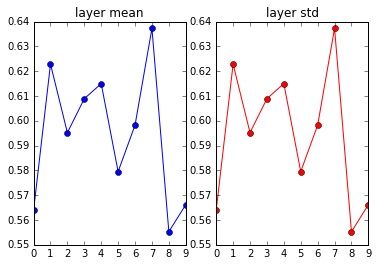

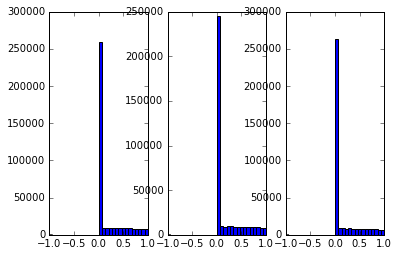

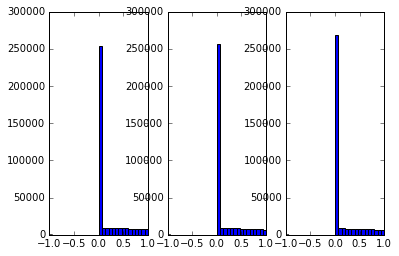

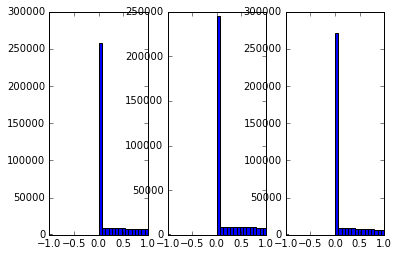

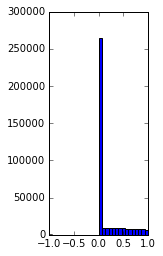

In [89]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

number_of_layers = 10
activation = 'relu'

D = np.random.randn(1000, 500)
hidden_layer_sizes = [500] * number_of_layers
nonlinearities = [activation] * len(hidden_layer_sizes)

act = {'relu': lambda x: np.maximum(0,x), 'tanh': lambda x: np.tanh(x)}
Hs = {}

for i in xrange(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[i]
    W = np.random.randn(fan_in, fan_out) * np.sqrt(2.0 / fan_in)
    
    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H

print('input layer has mean %f and std %f' % (np.mean(D), np.std(D)))
layer_means = [np.mean(H) for i, H in Hs.iteritems()]
layer_stds = [np.std(H) for i, H in Hs.iteritems()]
for i, H in Hs.iteritems():
    print('hidden layer %d has mean %f and std %f' % (i+1, layer_means[i], layer_stds[i]))

plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')

plt.subplot(122)
plt.plot(Hs.keys(), layer_means, 'or-')
plt.title('layer std')

plots_per_row = 3
for i, H in Hs.iteritems():
    plot_index = i % plots_per_row + 1
    if plot_index == 1:
        plt.figure()
    plt.subplot(1, plots_per_row, plot_index)
    plt.hist(H.ravel(), 30, range=(-1, 1))
plt.show()